In [1]:
%matplotlib inline

In [2]:
#dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#files to load

city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [4]:
#read the csv into a DataFrame

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
#get the columns that and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
#get the columns that and the rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
#get the data types of each column

city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
#get the unique values of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
#get the number of data points from the urban cities

sum(city_data_df['type']=="Urban")

66

In [11]:
#get the number of data points from the rual cities
sum(city_data_df['type']=="Rural")

18

In [12]:
#get the columns that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
#combine the data into a single set
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city','city'])

In [16]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
#create the urban cities dataframe

urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
#create the suburban and rural cities dataframes

suburban_cities_df= pyber_data_df[pyber_data_df['type']=='Suburban']

rural_cities_df= pyber_data_df[pyber_data_df['type']=='Rural']



In [19]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [20]:
#get the number of rides for urban cities

urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [21]:
#get the number of rides for rural and suburban cities

suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']

rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [22]:
#get the avg fare for each city in the urban cities

urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [23]:
#get the avg fare for each city in the subuurban and rural cities

suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']

rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [24]:
#get the avg number of drivers for each city type

urban_driver_count = urban_cities_df.groupby('city').mean()['driver_count']

rural_driver_count = rural_cities_df.groupby('city').mean()['driver_count']

suburban_driver_count = suburban_cities_df.groupby('city').mean()['driver_count']

In [25]:
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

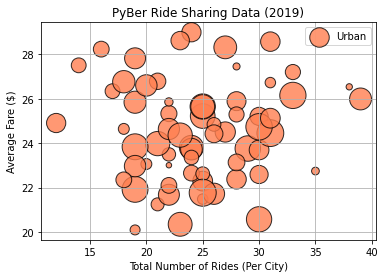

In [26]:
#build the scatter plots for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color='coral', edgecolor='black',linewidths=1, alpha=0.8,label="Urban")

plt.title('PyBer Ride Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

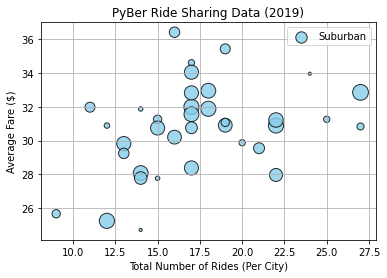

In [27]:
#build the scatter plots for suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, color='skyblue', edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
plt.title('PyBer Ride Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

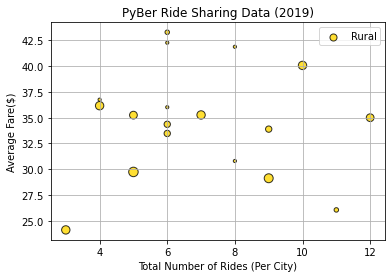

In [28]:
#build the scatter plots for rural cities

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, color='gold', edgecolor='black',linewidths=1, alpha=0.8,label='Rural')
plt.title('PyBer Ride Sharing Data (2019)')
plt.ylabel('Average Fare($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()


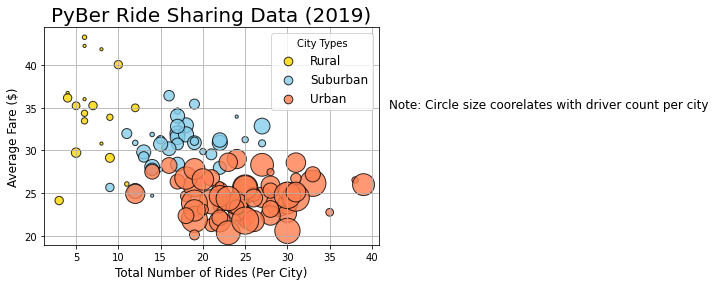

<Figure size 432x288 with 0 Axes>

In [29]:
#build the scatter plots for rural cities

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, color='gold', edgecolor='black',linewidths=1, alpha=0.8,label='Rural')
plt.title('PyBer Ride Sharing Data (2019)')
plt.ylabel('Average Fare($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

#build the scatter plots for suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, color='skyblue', edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
plt.title('PyBer Ride Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

#build the scatter plots for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color='coral', edgecolor='black',linewidths=1, alpha=0.8,label="Urban")

plt.title('PyBer Ride Sharing Data (2019)', fontsize=20)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.grid(True)

#create a legend
lgnd=plt.legend(fontsize=12, mode = "Expanded", scatterpoints=1, loc="best", title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize=12

#incorporate a text note about circle size
plt.text(42,35, "Note: Circle size coorelates with driver count per city", fontsize=12)

#show the plot
plt.show()

#save the figure
plt.savefig("analysis/Fig1.png")

In [30]:
#get my summary statistics

urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [31]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [32]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [33]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [34]:
#calculate the mean of the ride count for each city type

round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [35]:
urban_ride_count.median()

24.0

In [36]:
suburban_ride_count.mode()

0    17
dtype: int64

In [37]:
#import NumPy and stats module from SciPy

import numpy as np
import scipy.stats as sts

In [38]:
#calculate the measurese of central tendnecy for the ride count for the urban cities

mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for urban ride counts is {mean_urban_ride_count:.2f}')

median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for urban ride counts is {median_urban_ride_count:.2f}')

mode_urban_ride_count = sts.mode(urban_ride_count)

mode_urban_ride_count



The mean for urban ride counts is 24.62
The median for urban ride counts is 24.00


ModeResult(mode=array([22]), count=array([7]))

In [39]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
mode_suburban_ride_count

ModeResult(mode=array([17]), count=array([7]))

In [40]:
mode_rural_ride_count = sts.mode(rural_ride_count)
mode_rural_ride_count

ModeResult(mode=array([6]), count=array([5]))

In [41]:
#get the fares for urban cities

urban_fares = urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [42]:
#calculates the measures of central tendency for the avg fare for urban cities

mean_urban_fare = np.mean(urban_fares)
print(f'The mean fare price for urban cities is {mean_urban_fare:.2f}')

median_urban_fare = np.median(urban_fares)
print(f'The median fare price for urban cities is {median_urban_fare:.2f}')

mode_urban_fare = sts.mode(urban_fares)
mode_urban_fare

The mean fare price for urban cities is 24.53
The median fare price for urban cities is 24.64


ModeResult(mode=array([22.86]), count=array([5]))

In [43]:
#get the fares for suburban and ruraal cities

suburban_fares = suburban_cities_df['fare']

rural_fares = rural_cities_df['fare']

In [44]:
#get the average fare for suburban and rural cities

mean_suburban_fare = np.mean(suburban_fares)
print(f'The average fare price for suburban cities is {mean_suburban_fare:.2f}')

mean_rural_fare = np.mean(rural_fares)
print(f'The average fare price for rural cities is {mean_rural_fare:.2f}')

The average fare price for suburban cities is 30.97
The average fare price for rural cities is 34.62


In [45]:
#get the driver count for urban cities

urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [46]:
#get the driver count for suburban cities

suburban_drivers = suburban_cities_df['driver_count']

In [66]:
#get driver count for rural cities

rural_drivers=rural_cities_df['driver_count']

In [47]:
#the the average driver count suburban cities

mean_suburban_drivers = np.mean(suburban_drivers)
mean_suburban_drivers

13.712

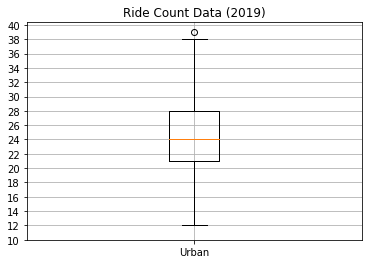

In [48]:
#create a box and whisker plot for urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

#add the title y axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel = ('Number of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()

plt.show()

In [49]:
#get summary statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

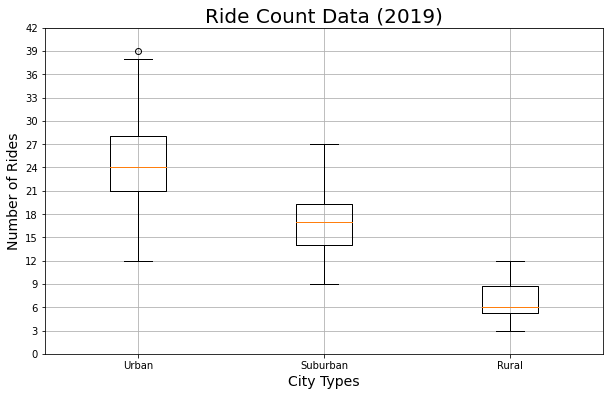

In [50]:
#add all city box and whisker plots on the same graph 
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_xlabel('City Types', fontsize=14)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()

#save the figure
plt.savefig('analysis/Fig2.png')
plt.show()


In [52]:
#get the city that matches 39

urban_city_outlier = urban_ride_count[urban_ride_count ==39].index[0]
print(f'{urban_city_outlier} has the highest rider count')

West Angela has the highest rider count


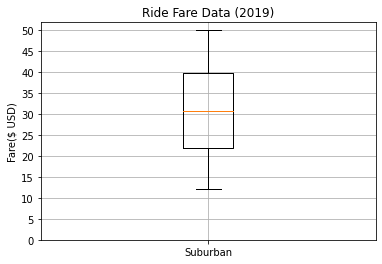

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [55]:
#create a box and whisket plot for the suburban fare data

x_labels=['Suburban']
fig,ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

#add the title, y axis labels, and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($ USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()

print('Summary Statistics')
suburban_fares.describe()


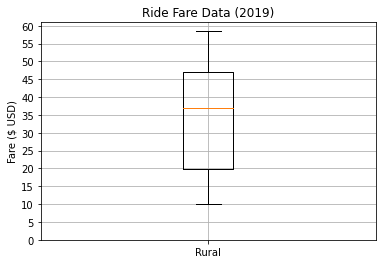

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [60]:
#create a box and whisker plot for the rural fare data

x_labels=['Rural']
fig,ax = plt.subplots()
ax.boxplot(rural_fares, labels = x_labels)

#add the title, y axis labels and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($ USD)')
ax.set_yticks(np.arange(0,65,step=5.0))
ax.grid()
plt.show()

print('Summary Statistics')
rural_fares.describe()

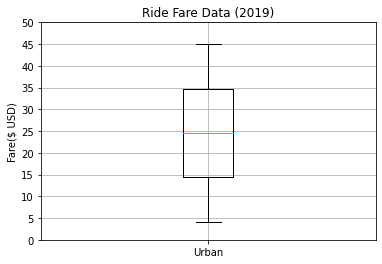

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [54]:
#create a box and whisker plot for the urban fare data

x_labels=['Urban']
fig,ax=plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

#add the title, y axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($ USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()

print('Summary Statistics')
urban_fares.describe()


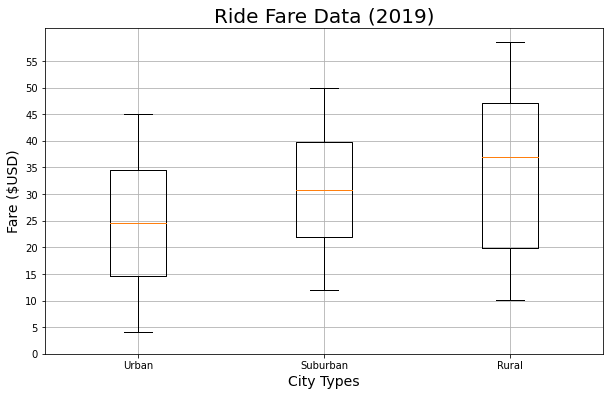

In [62]:
#add all city type fares box and whisker plot on same graph

x_labels=['Urban', 'Suburban', 'Rural']
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fare_data, labels= x_labels)

ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_xlabel('City Types', fontsize=14)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_yticks(np.arange(0,60, step=5.0))
ax.grid()

#save the figure
plt.savefig('analysis/Fig3.png')
plt.show()



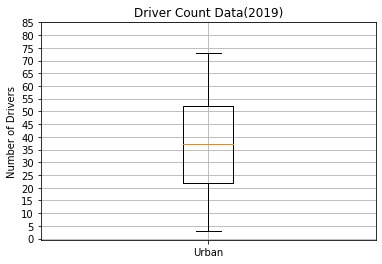

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [63]:
#create a box and whisker plot for the urban driver count data

x_labels=['Urban']
fig, ax =plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

#set title, y axis labels, and grid
ax.set_title('Driver Count Data(2019)')
ax.set_ylabel('Number of Drivers')
ax.grid()
ax.set_yticks(np.arange(0,90, step=5.0))
plt.show()

print('Summary Statistics')
urban_drivers.describe()

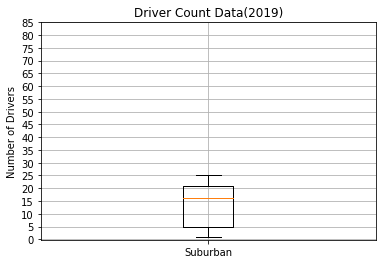

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [64]:
#create a box and whisker plot for Suburban driver count

x_labels=['Suburban']
fig,ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

ax.set_title('Driver Count Data(2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,90, step=5.0))
ax.grid()
plt.show()

print('Summary Statistics')
suburban_drivers.describe()

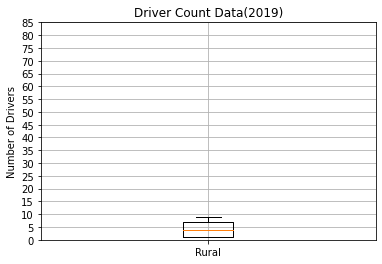

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [70]:
#create a box and whisker plot for rural driver count

x_labels=['Rural']
fig,ax=plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

ax.set_title('Driver Count Data(2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,90, step=5.0))
ax.grid()
plt.show()

print('Summary Statistics')
rural_drivers.describe()

In [ ]:
#create a box and whisker plot with driver counts for all city types

x_labels=['Urban', 'Suburban', 'Rural']
driver_count=[urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_xlabel('City Types', fontsize=14)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,75, step=5.0))
ax.grid()

#save the figure
plt.savefig('analysis/Fig2.png')
plt.show()

